In [1]:
# Required imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the Data Into a Pandas DataFrame

In [3]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_default_df = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/ccinfo-transformed.csv")

ccinfo_default_df

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary,customer_segments
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1,2
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1,2
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1,0
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1,0
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4994,-1.117341,1,36,-0.392558,-0.422089,0,0,0,0,1,0
4995,0.110497,1,34,-0.589218,-0.152107,0,1,0,0,0,0
4996,0.263977,1,45,1.115249,-0.163492,1,0,0,0,1,1
4997,1.108115,1,44,3.338132,0.760455,0,0,1,0,0,0


<Axes: xlabel='limit_bal', ylabel='age'>

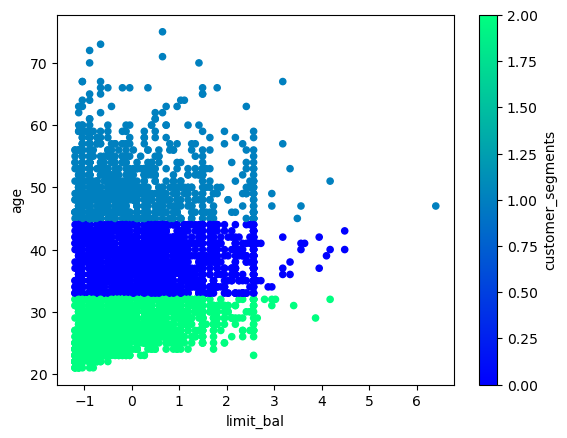

In [7]:
# Plot the clusters using the "limit_bal" and "age" columns
ccinfo_default_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="customer_segments",
    colormap="winter")

<Axes: xlabel='bill_amt', ylabel='pay_amt'>

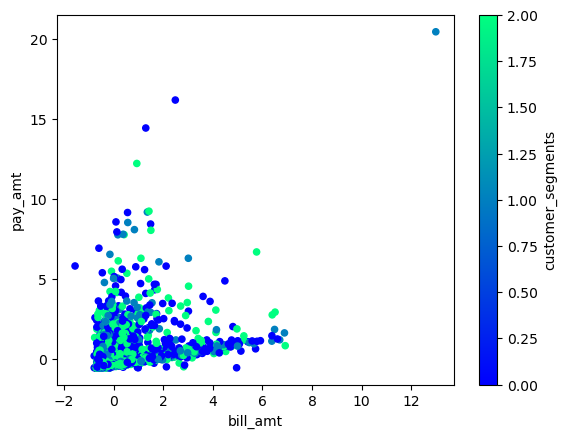

In [6]:
# Plot the clusters using the "bill_amt" and "pay_amt" columns
ccinfo_default_df.plot.scatter(
    x="bill_amt",
    y="pay_amt",
    c="customer_segments",
    colormap="winter")


## Use PCA to reduce the number of factors 

In [8]:
# Import the PCA module
from sklearn.decomposition import PCA

In [9]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [10]:
# Fit the PCA model on the transformed credit card DataFrame
ccinfo_pca = pca.fit_transform(ccinfo_default_df)

# Review the first 5 rows of list data
ccinfo_pca[:5]

array([[-11.4106317 ,  -1.19426208],
       [ -9.424725  ,  -0.75732157],
       [ -1.33620686,  -0.69534399],
       [  1.67884463,  -0.76676318],
       [ 21.58943237,  -0.9373152 ]])

## PCA explained variance ratio

In [11]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.95017303, 0.01898131])

## Creating the PCA DataFrame

In [12]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)


# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,-11.410632,-1.194262
1,-9.424725,-0.757322
2,-1.336207,-0.695344
3,1.678845,-0.766763
4,21.589432,-0.937315


## Incorporating the PCA DataFrame into the elbow method

/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

<Axes: xlabel='k'>

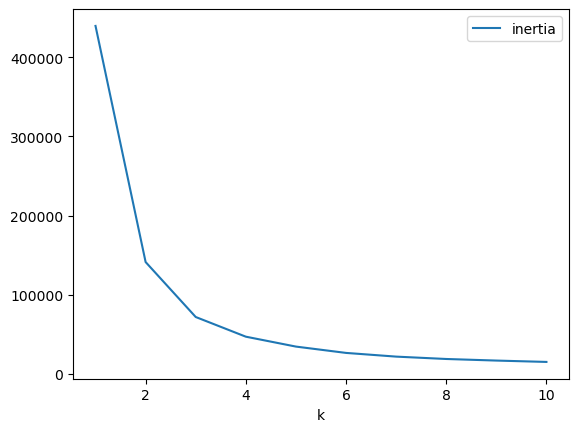

In [13]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

# Plot the elbow curve
df_elbow.plot.line(
    x="k",
    y="inertia"
)

<Axes: xlabel='k'>

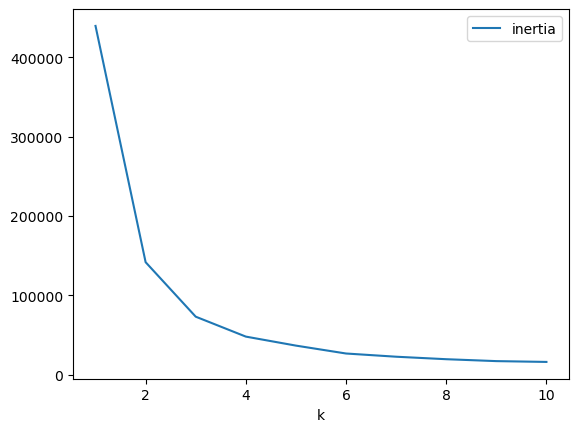

In [11]:
# Plot the Elbow Curve


In [14]:
# Determine the rate of decrease between each k value. 
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 67.84%
Percentage decrease from k=2 to k=3: 49.10%
Percentage decrease from k=3 to k=4: 34.53%
Percentage decrease from k=4 to k=5: 26.55%
Percentage decrease from k=5 to k=6: 23.10%
Percentage decrease from k=6 to k=7: 17.58%
Percentage decrease from k=7 to k=8: 13.64%
Percentage decrease from k=8 to k=9: 10.55%
Percentage decrease from k=9 to k=10: 10.09%


## Segmentation of the PCA data with K-means 

In [15]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_3 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_3

/Users/phillipasberry/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PCA1', ylabel='PCA2'>

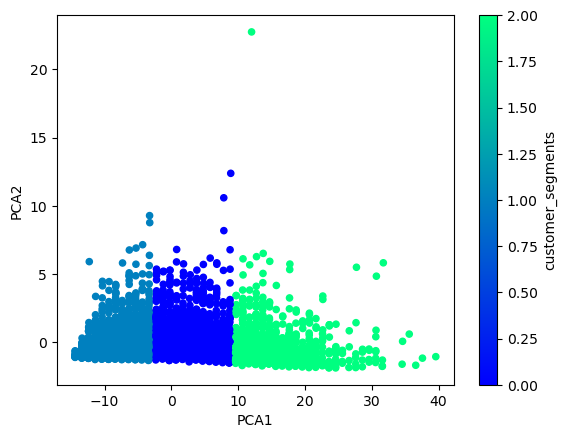

In [16]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap="winter"
)